## Module 7 Assignment

## Part 1: Review Code & Add Comments

### Code Overview
In sample code we will be using the LogisticRegressionCV algorithm and StandardScaler to build a classification model that predicts whether a passenger on the Titanic survived or not. We will be using the Titanic dataset, which contains information about passengers on the Titanic, including their age, gender, class, and whether they survived or not. You will preprocess the data, split it into training and testing sets, scale the data, train a logistic regression model using cross-validation, and evaluate the model's performance using precision, recall, and F1-score.


The Titanic dataset contains data about passengers on the Titanic, including their age, gender, class, and whether they survived or not. The dataset includes 891 rows and 12 columns, including the target variable "Survived", which indicates whether the passenger survived or not.

### The other features in the dataset include:

- Pclass: the passenger's class (1st, 2nd, or 3rd)
- Name: the passenger's name
- Sex: the passenger's gender
- Age: the passenger's age
- SibSp: the number of siblings or spouses on board
- Parch: the number of parents or children on board
- Ticket: the passenger's ticket number
- Fare: the price of the passenger's ticket
- Cabin: the passenger's cabin number
- Embarked: the port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
Evaluation Criteria
- Your submission will be evaluated on the following criteria:


Submit a clear and concise interpretation of the code added in the markdown comments.

In [56]:
# Install yellowbrick
!pip3 install yellowbrick
!pip install yellowbrick
!pip3 install --upgrade pip

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\brenn\anaconda3\python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_recall_fscore_support

In [58]:
# Load the Titanic dataset into a pandas DataFrame
titanic = pd.read_csv('titanic.csv')
print(titanic.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [59]:
# Drop unneeded columns and convert categorical variables to numeric
# Remove PassengerId, Name, Ticket, and Cabin because they are identifiers or sparse;
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# Create dummy variables for 'Sex' and 'Embarked' and drop any rows with missing values.
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)
titanic = titanic.dropna()
print(titanic.head(5))

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [60]:
# Separate features (X) from the target variable (y) and split into train/test sets
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Initialize and train a logistic regression model
clf = LogisticRegressionCV(cv=5, random_state=42)
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=42)

In [63]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [64]:
# Compute precision, recall, and F1 score for the binary classification
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.7307692307692307
Recall:  0.6404494382022472
F1 Score:  0.6826347305389222


C:\Users\brenn\anaconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


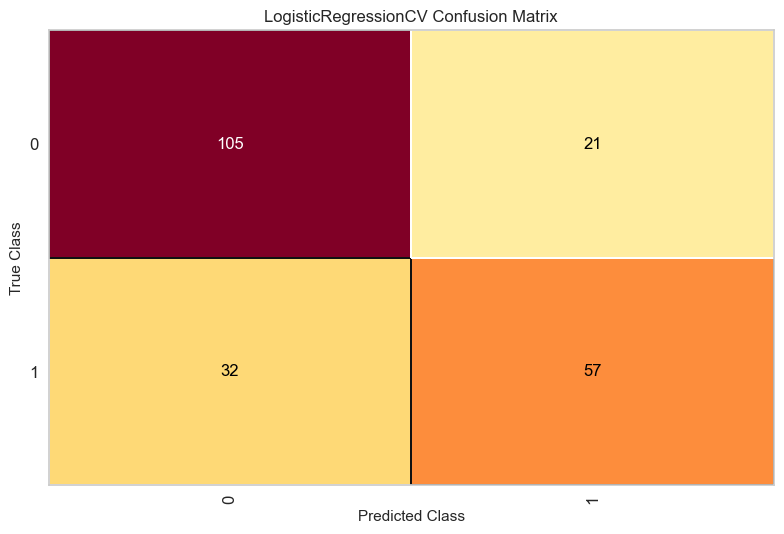

<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [65]:
# Plot the confusion matrix
cm = ConfusionMatrix(clf, classes=[0,1])
cm.score(X_test, y_test)
cm.show()

C:\Users\brenn\anaconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


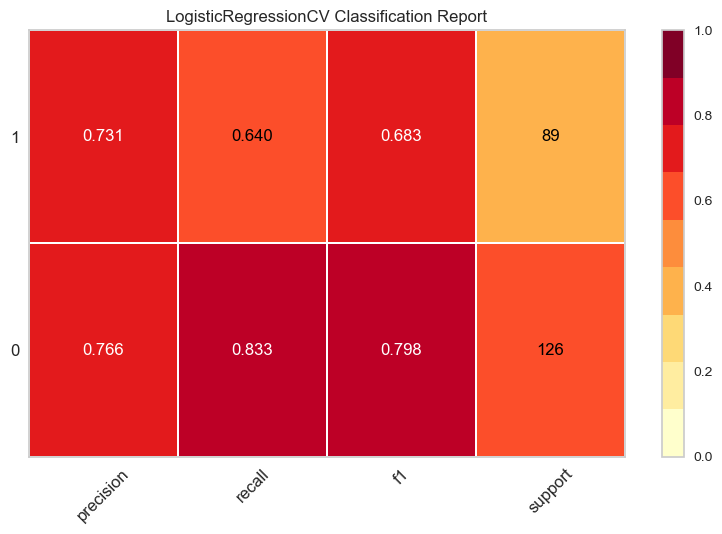

<Axes: title={'center': 'LogisticRegressionCV Classification Report'}>

In [66]:
# Display a detailed classification report of precision, recall, F1-score, and support with counts
report = ClassificationReport(clf, classes=[0,1], support=True)
report.score(X_test, y_test)
report.show()

## Part 2: Your Turn

### Wine Dataset Classification using Logistic RegressionCV and StandardScaler
In this assignment, you will be using the LogisticRegressionCV algorithm and StandardScaler to build a classification model that can predict the wine class. You will be using the "Wine Data Set" from the sklearn library, which contains information about the chemical composition of wines grown in the same region in Italy. You will preprocess the data, split it into training and testing sets, scale the data, train a logistic regression model using cross-validation, and evaluate the model's performance using a classification report.

#### Dataset
The "Wine Data Set" contains data about the chemical composition of wines grown in the same region in Italy. The dataset includes 178 rows and 13 columns, including the target variable "target", which indicates the wine class.

#### The other features in the dataset include:

- alcohol: the alcohol content of the wine
- malic_acid: the malic acid content of the wine
- ash: the ash content of the wine
- alcalinity_of_ash: the alcalinity of ash of the wine
- magnesium: the magnesium content of the wine
- total_phenols: the total phenols content of the wine
- flavanoids: the flavanoids content of the wine
- nonflavanoid_phenols: the nonflavanoid phenols content of the wine
- proanthocyanins: the proanthocyanins content of the wine
- color_intensity: the color intensity of the wine
- hue: the hue of the wine
- od280/od315_of_diluted_wines: the OD280/OD315 of diluted wines
- proline: the proline content of the wine

The target variable "target" has three classes:

- Class 0: 59 instances
- Class 1: 71 instances
- Class 2: 48 instances

Requirements
- Load the dataset into a pandas DataFrame.
- Split the dataset into training and testing sets, with 70% of the data for training and 30% for testing.
- Scale the numerical features using StandardScaler.
- Train a logistic regression model using cross-validation (LogisticRegressionCV) on the training data. Use a 5-fold cross-validation, and set the regularization parameter C to a value of 1.
- Evaluate the performance of the model on the testing data using a classification report, which includes precision, recall, f1-score, and support for each class.
- Interpret the results of the model

In [69]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from yellowbrick.classifier import ClassificationReport

# Load the dataset into a pandas DataFrame
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

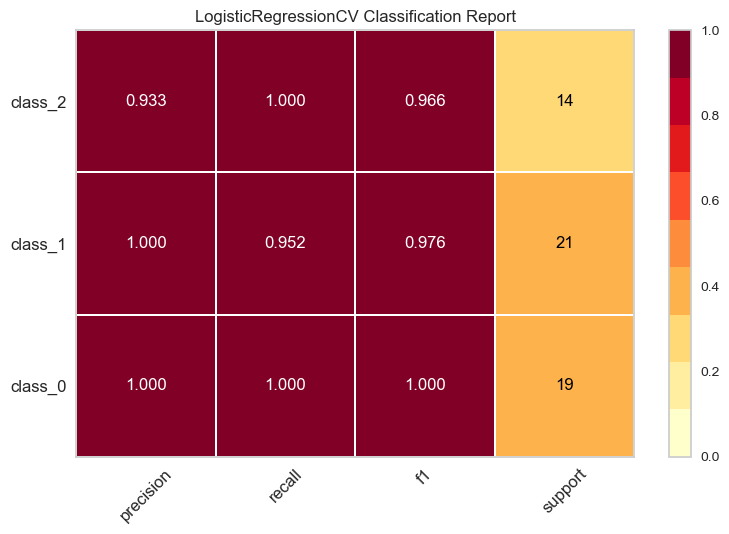

<Axes: title={'center': 'LogisticRegressionCV Classification Report'}>

In [70]:
# Split the data into training and testing sets
X = df[wine.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


# Train the logistic regression model using cross-validation
clf = LogisticRegressionCV(cv=5, Cs=[1], random_state=42, max_iter=10000)
clf.fit(X_train, y_train)


# Visualize precision, recall, and f1 scores using Yellowbrick
visualizer = ClassificationReport(
    clf,
    classes=wine.target_names,
    support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
